In [1]:
    
# NLTK and visualization

import nltk

from pprint import pprint




# Čitanje označenog korpusa
* Korištenjem `TaggedCorpusReader` klase možemo učitati POS označene tekstove. 
* Klasa nudi mogućnost ispisivanja teksta s oznakama kao listu riječi ili rečenica ili odlomaka (`tagged_words()`,`tagged_sents()`,`tagged_paras()`)

Skupovi oznaka (tagset) nisu jedinstveni, najčešće koristimo universal tagset (vidi [POS](https://universaldependencies.org/u/pos/)): 

![uPoS](universal.png) 

NLTK dopušta definiranje vlastito POS označenog teksta koji se može učitati kao korpus. U nastavku stvaramo takav jedan tekst zatim učitavamo kao korpus.

In [3]:
%%writefile tagged.pos
The/at-tl expense/nn and/cc time/nn involved/vbn are/ber astronimical/jj ./.

Overwriting tagged.pos


In [10]:
from nltk.corpus import TaggedCorpusReader
reader = TaggedCorpusReader('.',['tagged.pos'])
reader.words() # rijeci
reader.tagged_words()[:]

# Brown tagset
reader = TaggedCorpusReader('.',['tagged.pos'],tagset='en-brown')
#reader.tagged_words(tagset='universal')[:]
#reader.tagged_sents(tagset='universal')[:]
reader.tagged_paras(tagset='universal')[:]

[[[('The', 'DET'),
   ('expense', 'NOUN'),
   ('and', 'CONJ'),
   ('time', 'NOUN'),
   ('involved', 'VERB'),
   ('are', 'VERB'),
   ('astronimical', 'ADJ'),
   ('.', '.')]]]

In [11]:
from nltk.corpus import treebank 
# treebank.raw() 
treebank.words()[:10]
treebank.tagged_words()[0:10]
treebank.tagged_words(tagset='universal')[0:10]
#treebank.tagged_words(tagset='brown')[0:10] # Brown tagset 'UNK=unknown'


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

# Komadi (engl. chunks) teksta
Neke riječi učestalo dolaze kao komadi teksta (engl. primjeri: _instead of, all the time, ..._). NLTK paket nudi mogućnost učitavanja korpusa u kojem su definirani komadi teksta.

In [4]:
%%writefile chunked.chunk
[Earlier/JJR staff-reduction/NN moves/NNS] have/VBP trimmed/VBN about/IN [300/CD jobs/NNS] ,/, [the/DT spokesman/NN] said/VBD ./.

Overwriting chunked.chunk


In [2]:
from nltk.corpus.reader import ChunkedCorpusReader
reader = ChunkedCorpusReader('.','chunked.chunk')
tree = reader.chunked_words()[0:10]

#show_parse(tree[0])
pprint(tree[0])

Tree('NP', [('Earlier', 'JJR'), ('staff-reduction', 'NN'), ('moves', 'NNS')])


Napredniji oblik označavanja komada jest korištenjem __IOB oznaka__:
   * oznaka početka komada : B-TT (npr. B-NP)
   * oznaka da se riječ nalazi u komadu: I-TT (npr. I-VP)
   * oznaka kraja: O (npr. .. O označava kraj rečenice)

In [3]:
%%writefile chunked.iob
Mr. NNP B-NP 
Meador NNP I-NP
had VBD B-VP
been VBN I-VP
executive JJ B-NP
vice NN I-NP
president NN I-NP
of IN B-PP
Balcor NNP B-NP
. . O

Overwriting chunked.iob


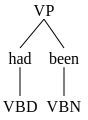

In [5]:
# Conn11 korpus chunkParser
from nltk.corpus.reader import ConllChunkCorpusReader
reader = ConllChunkCorpusReader('.','chunked.iob',('NP','VP','PP'))
trees = reader.chunked_words()

# mozemo koristiti pretty_print ili pomocnu funkciju show_parse
trees[1]

# Frazeološka gramatika (engl. Phrase structure grammar)

## Djelomično parsiranje: Komadanje (engl. Chunking)

 > postupak izvlačenja djelomičnih fraza na temelju POS oznaka rečenice.

Koristeći regexe možemo definirati koje oznake mogu definirati **komad (chunk)** , ali i one oznake koje ne mogu biti u komadu (pukotine, engl. **chinks** )

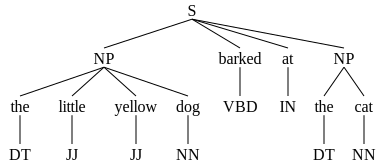

In [7]:
import nltk
from nltk.chunk import RegexpParser

sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]

# gramatika koja definira NP komad
grammar = "NP: {<DT>?<JJ>*<NN>}"


# parser
cp = nltk.RegexpParser(grammar)

# stablo
tree = cp.parse(sentence)

tree


Istraživanje komada u korpusima.

Pukotine (engl. chinks) definiramo preko `}{` zagrada. 

## Ugnježđeno parsiranje

Opisom kaskadnog skupa regex pravila mogu se definirati ugnježđena pravila komadanja.

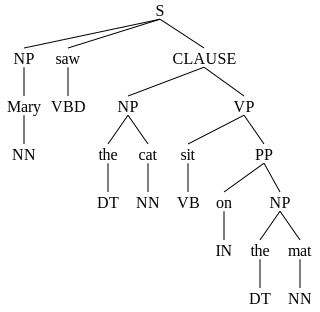

In [8]:
grammar = r"""  
  NP: {<DT|JJ|NN.*>+}          # NP komad koji se sastoji od DT ili JJ ili NN
  PP: {<IN><NP>}               # PP (prijedlog) komadaj iza <IN><NP>
  VP: {<VB.*><NP|PP|CLAUSE>+$} # VP se sastoji od svih oblika VB komada u kombinaciji sa NP PP CLAUSE 
  CLAUSE: {<NP><VP>}           # zavisna rečenica koja se sastoji od NP i VP
  """
cp = nltk.RegexpParser(grammar)
sentence = [("Mary", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"),
    ("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]

cp.parse(sentence)

# Cjelovito parsiranje
 >  jezik = rekurzivna produkcija gramatičkih pravila 
 
 **Pristup**: formalni okvir generativne gramatike temeljene na kontekstno slobodnoj gramatici (engl. context-free-grammar (CFG))

In [9]:
groucho_grammar = nltk.CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | Det N PP | 'I'
... VP -> V NP | VP PP
... Det -> 'an' | 'my'
... N -> 'elephant' | 'pajamas'
... V -> 'shot'
... P -> 'in'
... """)

# jednostavna tokenizacija
sent = 'I shot an elephant in my pajamas'.split()

print('A Grammar:', groucho_grammar)
print('grammar.start()   =>', groucho_grammar.start())
print('grammar.productions() =>')

print(groucho_grammar.productions())

# nekoliko stabala ...
parser = nltk.ChartParser(groucho_grammar) # koristi ćemo ChartParser umjesto CKY da ne moramo konvertirati u CNF
trees = list(parser.parse(sent))


A Grammar: Grammar with 13 productions (start state = S)
    S -> NP VP
    PP -> P NP
    NP -> Det N
    NP -> Det N PP
    NP -> 'I'
    VP -> V NP
    VP -> VP PP
    Det -> 'an'
    Det -> 'my'
    N -> 'elephant'
    N -> 'pajamas'
    V -> 'shot'
    P -> 'in'
grammar.start()   => S
grammar.productions() =>
[S -> NP VP, PP -> P NP, NP -> Det N, NP -> Det N PP, NP -> 'I', VP -> V NP, VP -> VP PP, Det -> 'an', Det -> 'my', N -> 'elephant', N -> 'pajamas', V -> 'shot', P -> 'in']


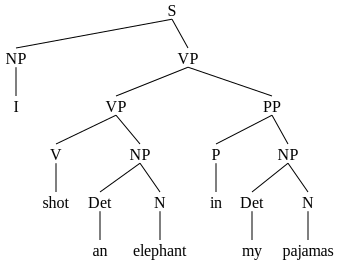

In [10]:
trees[0]

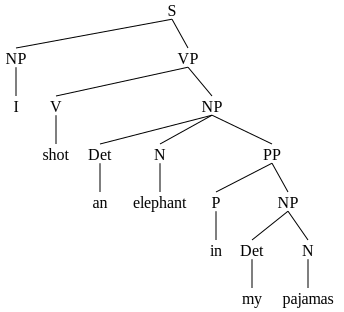

In [11]:
trees[1]

In [12]:
%%writefile hr_grammar.cfg
S -> VP NP
PP -> P NP   
NP -> N | N PP 
VP -> V NP | VP PP | V AUX 
N -> 'slon' | 'slona' | 'pidjamama' | 'pidjami'
V -> 'upucati' | 'upucao'
AUX -> 'sam'
P -> 'u'



Overwriting hr_grammar.cfg


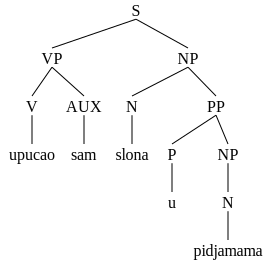

In [13]:
grammar = nltk.data.load('hr_grammar.cfg')

sent = 'upucao sam slona u pidjamama'.split()

# nekoliko stabala ...
parser = nltk.ChartParser(grammar) # ili RecursiveDescentParser

hr_trees = list(parser.parse(sent))

# ispisimo jedno od stabala
hr_trees[0]



In [14]:
# evaluacija gramatika
import nltk
from nltk import CFG

grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N | 'I'
    VP -> V NP
    Det -> 'the' | 'a'
    N -> 'cat' | 'dog'
    V -> 'chased'
    P -> 'with'
""")

test_data = [
    ("I chased a cat", "(S (NP I) (VP (V chased) (NP (Det a) (N cat))))"),
    ("a dog chased a cat", "(S (NP (Det a) (N dog)) (VP (V chased) (NP (Det a) (N cat))))"),
    ("I chased the cat with a dog", "(S (NP I) (VP (V chased) (NP (Det the) (N cat) (PP (P with) (NP (Det a) (N dog))))))"),    
]



parser = nltk.ChartParser(grammar)

from nltk.parse import evaluate

correct = 0
total = 0

for sentence, ref_tree in test_data:
    parse_trees = list(parser.parse(sentence.split()))
    if len(parse_trees) > 0:
        parse_tree = parse_trees[0]
        print(f'{sentence} <= {parse_tree}')
        if str(parse_tree) == ref_tree:            
            correct += 1
    total += 1
    
# koliko sam stabala točno parsirao?

print("Preciznost: {:.2%}".format(correct / total))

# uočimo da se ova mjera razlikuje of PARSEVAL



I chased a cat <= (S (NP I) (VP (V chased) (NP (Det a) (N cat))))
a dog chased a cat <= (S (NP (Det a) (N dog)) (VP (V chased) (NP (Det a) (N cat))))
Preciznost: 66.67%


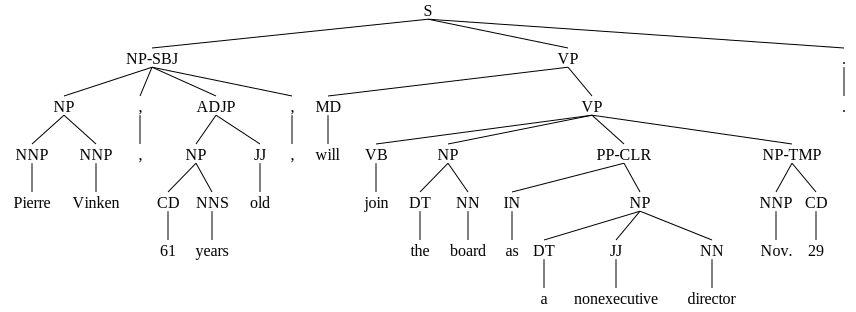

In [15]:
# Banke stabala
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t


CFG gramatika može biti spremljena i u vanjskoj datoteci.

## PCFG: vjerojatnosna CFG

PCFG su CFG u kojem odabir produkcijskog pravila ovisi o vjerojatnosnoj distribuciji.

In [16]:
grammar = nltk.PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> Det N [0.5] | NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
    Det -> 'the' [0.8] | 'my' [0.2]
    N -> 'man' [0.5] | 'telescope' [0.5]
    VP -> VP PP [0.1] | V NP [0.7] | V [0.2]
    V -> 'ate' [0.35] | 'saw' [0.65]
    PP -> P NP [1.0]
    P -> 'with' [0.61] | 'under' [0.39]
""")

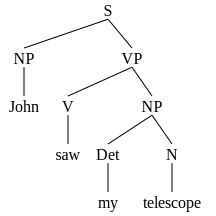

0.002275

In [17]:
from nltk import PCFG
from nltk.parse import ViterbiParser



sent = 'John saw my telescope'.split()

parser = ViterbiParser(grammar) 

trees = list(parser.parse(sent))

display(trees[0])

# vjerojatnost stabla
trees[0].prob()
